In [88]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [2]:
data=pd.read_excel('D:\Download usb\Downloads\olx.xlsx', 'Sheet1')

# Data Cleaning

In [4]:
data.head(5)

,id,title,location,price_final,bedrooms,bathrooms,Area,types,Property_Type,Payment_method,Condition,Furnished,seller,Member_since,link
0,114683827,Apartment F1-A4: First Floor Ironda 6,"Athens, Greece","297,270",2,1,66,Apartments & Villas For Sale,Apartment,Cash,Under Construction,Not mention,Valenci Luxury Developers,Oct 2020,https://www.olx.com.lb/ad/apartment-f1-a4-firs...
1,114960710,115 m2 apartment with a garden having an open ...,"Mansourieh, Metn","82,000",2,2,125,Apartments & Villas For Sale,Apartment,Cash,Ready to move in,Unfurnished,Isold real estate,Nov 2016,https://www.olx.com.lb/ad/115-m2-apartment-wit...
2,114960633,kabelias highway apartment for sale Ref# 4874,"Qoub Elias, Zahle","40,000",2,2,150,Apartments & Villas For Sale,Apartment,Cash,Ready to move in,Not mention,Terra Casa,Dec 2015,https://www.olx.com.lb/ad/kabelias-highway-apa...
3,114260175,Villa for Sale in El Shorouk - Egypt - فيلا لل...,"Other in Egypt, Egypt","275,000",4,4,"275,000",Apartments & Villas For Sale,Villa,Cash,Under Construction,Unfurnished,OLX Properties,Feb 2022,https://www.olx.com.lb/ad/villa-for-sale-in-el...
4,114900162,Great catch in safra! 110sqm fully furnished a...,"Safra, Keserouan","80,000",2,2,110,Apartments & Villas For Sale,Apartment,Cash,Ready to move in,Fully Furnished,Confidence Real Estate,Oct 2017,https://www.olx.com.lb/ad/great-catch-in-safra...


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8955 entries, 0 to 8954
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              8955 non-null   object
 1   title           8955 non-null   object
 2   location        8953 non-null   object
 3   price_final     8955 non-null   object
 4   bedrooms        8955 non-null   object
 5   bathrooms       8955 non-null   int64 
 6   Area            8955 non-null   object
 7   types           8955 non-null   object
 8   Property_Type   8955 non-null   object
 9   Payment_method  8955 non-null   object
 10  Condition       8955 non-null   object
 11  Furnished       8955 non-null   object
 12  seller          8955 non-null   object
 13  Member_since    8955 non-null   object
 14  link            8955 non-null   object
dtypes: int64(1), object(14)
memory usage: 1.0+ MB


we can drop some columns that not necessary for analysis (id,link,Mem,ber since )

In [6]:
data=data.drop(['id','Member_since','link'], axis=1)

Rename Columns

In [8]:
data = data.rename(columns={'title': 'Title', 'price_final': 'Price',  'bedrooms': 'Bedrooms', 'bathrooms': 'Bathrooms', 'seller': 'Seller', 'location': 'Location'})

Checking for null values

In [9]:
print(data.isnull().sum())

Title             0
Location          2
Price             0
Bedrooms          0
Bathrooms         0
Area              0
types             0
Property_Type     0
Payment_method    0
Condition         0
Furnished         0
Seller            0
dtype: int64


In [10]:
data.dropna(subset=['Location'], axis=0, inplace=True)

In [5]:
data['price_final']=data['price_final'].str.replace(',','')

Checking for duplicated_value

In [11]:
data[data.duplicated()]

,Title,Location,Price,Bedrooms,Bathrooms,Area,types,Property_Type,Payment_method,Condition,Furnished,Seller
137,kabelias highway apartment for sale Ref# 4874,"Qoub Elias, Zahle","40,000",2,2,150,Apartments & Villas For Sale,Apartment,Cash,Ready to move in,Not mention,Terra Casa
142,This luxurious 350 SQM Duplex apartment with i...,"Jbeil Town, Jbeil","215,000",4,3,350,Apartments & Villas For Sale,Apartment,Cash,Ready to move in,Not mention,Confidence Real Estate
183,Duplex 210m² With Terrace For SALE Furnished,"Haret Sakher, Keserouan","239,999",3,4,210,Apartments & Villas For Sale,Apartment,Cash,Ready to move in,Fully Furnished,BluSky Properties
185,165Sqm|Fully furnished apartment for sale in T...,"Tilal Ain Saade, Metn","200,000",3,3,165,Apartments & Villas For Sale,Apartment,Cash,Ready to move in,Fully Furnished,Trust Lebanon
247,Duplex 210m² With Terrace For SALE Furnished,"Haret Sakher, Keserouan","239,999",3,4,210,Apartments & Villas For Sale,Apartment,Cash,Ready to move in,Fully Furnished,BluSky Properties
...,...,...,...,...,...,...,...,...,...,...,...,...
8911,Apartment for sale in Shayle Cash REF #8021537,"Sehayleh, Keserouan","130,000",2,3,155,Apartments & Villas For Sale,Apartment,Cash,Ready to move in,Unfurnished,Yazbek Real Estate
8912,168 SQM Prime Location Furnished Apartment in ...,"Beit El Chaar, Metn","148,000",3,3,168,Apartments & Villas For Sale,Apartment,Cash,Ready to move in,Fully Furnished,Golden Land
8913,330 Sqm with 40 Sqm Terrace | Duplex for sale ...,"Ain Saadeh, Metn","475,000",4,5,330,Apartments & Villas For Sale,Apartment,Cash,Ready to move in,Unfurnished,Trust Lebanon
8914,Don’t miss out this amazing deal in Hazmieh! R...,"Hazmiyeh, Baabda","150,000",2,1,150,Apartments & Villas For Sale,Apartment,Cash,Ready to move in,Not mention,Confidence Real Estate


In [12]:
data=data.drop_duplicates()

In [17]:
data

,Title,Location,Price,Bedrooms,Bathrooms,Area,types,Property_Type,Payment_method,Condition,Furnished,Seller
0,Apartment F1-A4: First Floor Ironda 6,"Athens, Greece","297,270",2,1,66,Apartments & Villas For Sale,Apartment,Cash,Under Construction,Not mention,Valenci Luxury Developers
1,115 m2 apartment with a garden having an open ...,"Mansourieh, Metn","82,000",2,2,125,Apartments & Villas For Sale,Apartment,Cash,Ready to move in,Unfurnished,Isold real estate
2,kabelias highway apartment for sale Ref# 4874,"Qoub Elias, Zahle","40,000",2,2,150,Apartments & Villas For Sale,Apartment,Cash,Ready to move in,Not mention,Terra Casa
3,Villa for Sale in El Shorouk - Egypt - فيلا لل...,"Other in Egypt, Egypt","275,000",4,4,"275,000",Apartments & Villas For Sale,Villa,Cash,Under Construction,Unfurnished,OLX Properties
4,Great catch in safra! 110sqm fully furnished a...,"Safra, Keserouan","80,000",2,2,110,Apartments & Villas For Sale,Apartment,Cash,Ready to move in,Fully Furnished,Confidence Real Estate
...,...,...,...,...,...,...,...,...,...,...,...,...
8950,فيلة رائعة في قدموس تبعد دقيقة واحدة عن الاوتو...,"Other in Tyre, Tyre","500,000",4,4,550,Apartments & Villas For Sale,Villa,Cash,Ready to move in,Not mention,Georgio Bou Rjayly
8951,"Super Catch (160Sq) In Mar Elias Prime, شقة لل...","Mar Elias, Beirut","235,000",3,3,160,Apartments & Villas For Sale,Apartment,Cash,Ready to move in,Not mention,Spectrum Holding
8952,"Hot Deal (250Sq) Duplex In Hazmieh Prime, دوبل...","Hazmiyeh, Baabda","290,000",3,4,305,Apartments & Villas For Sale,Apartment,Cash,Ready to move in,Unfurnished,Spectrum Holding
8953,"Super Catch (220Sq) In Ras El Nabeh Prime, شقة...","Ras Al Nabaa, Beirut","400,000",3,4,220,Apartments & Villas For Sale,Apartment,Cash,Ready to move in,Not mention,Spectrum Holding


we need to change some types of Columns like price,bedrooms,bathrooms,Area..

In [18]:
data['Price']=data['Price'].str.replace(',','')

we found some price have value '-' so we need to delete them 


In [19]:
tdelete=data["Price"].str.contains('-')

In [20]:
data = data[~tdelete]

convert price column to float data type

In [21]:
data['Price'] = data['Price'].astype(float)

C:\Users\Admin\AppData\Local\Temp\ipykernel_4500\870611651.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price'] = data['Price'].astype(float)


In [22]:
data["Area"]=data["Area"].str.replace(',','')

C:\Users\Admin\AppData\Local\Temp\ipykernel_4500\1116873713.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Area"]=data["Area"].str.replace(',','')


In [23]:
data['Area'] = data['Area'].astype(float)

C:\Users\Admin\AppData\Local\Temp\ipykernel_4500\192244223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Area'] = data['Area'].astype(float)


We have type Studio , and for definition studio is a merge of living room and bedrooms so we can convert studio to 1 

In [24]:
data.Bedrooms.unique()

array(['2', '4', '3', '6', '1', '7', '5', 'Studio', '8', '12', '10', '11',
       '9'], dtype=object)

In [25]:
data["Bedrooms"]=data["Bedrooms"].str.replace('Studio','1')

C:\Users\Admin\AppData\Local\Temp\ipykernel_4500\1315240230.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Bedrooms"]=data["Bedrooms"].str.replace('Studio','1')


In [26]:
data['Bedrooms'] = data['Bedrooms'].astype(float)

C:\Users\Admin\AppData\Local\Temp\ipykernel_4500\2671636817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Bedrooms'] = data['Bedrooms'].astype(float)


let's split the location column to city and district 


In [27]:
data[['City', 'District']] = data['Location'].str.split(',', expand=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_4500\99219220.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['City', 'District']] = data['Location'].str.split(',', expand=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_4500\99219220.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['City', 'District']] = data['Location'].str.split(',', expand=True)


we can now delete the location column

In [28]:
data.drop(['Location'], axis=1)

,Title,Price,Bedrooms,Bathrooms,Area,types,Property_Type,Payment_method,Condition,Furnished,Seller,City,District
0,Apartment F1-A4: First Floor Ironda 6,297270.0,2.0,1,66.0,Apartments & Villas For Sale,Apartment,Cash,Under Construction,Not mention,Valenci Luxury Developers,Athens,Greece
1,115 m2 apartment with a garden having an open ...,82000.0,2.0,2,125.0,Apartments & Villas For Sale,Apartment,Cash,Ready to move in,Unfurnished,Isold real estate,Mansourieh,Metn
2,kabelias highway apartment for sale Ref# 4874,40000.0,2.0,2,150.0,Apartments & Villas For Sale,Apartment,Cash,Ready to move in,Not mention,Terra Casa,Qoub Elias,Zahle
3,Villa for Sale in El Shorouk - Egypt - فيلا لل...,275000.0,4.0,4,275000.0,Apartments & Villas For Sale,Villa,Cash,Under Construction,Unfurnished,OLX Properties,Other in Egypt,Egypt
4,Great catch in safra! 110sqm fully furnished a...,80000.0,2.0,2,110.0,Apartments & Villas For Sale,Apartment,Cash,Ready to move in,Fully Furnished,Confidence Real Estate,Safra,Keserouan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8950,فيلة رائعة في قدموس تبعد دقيقة واحدة عن الاوتو...,500000.0,4.0,4,550.0,Apartments & Villas For Sale,Villa,Cash,Ready to move in,Not mention,Georgio Bou Rjayly,Other in Tyre,Tyre
8951,"Super Catch (160Sq) In Mar Elias Prime, شقة لل...",235000.0,3.0,3,160.0,Apartments & Villas For Sale,Apartment,Cash,Ready to move in,Not mention,Spectrum Holding,Mar Elias,Beirut
8952,"Hot Deal (250Sq) Duplex In Hazmieh Prime, دوبل...",290000.0,3.0,4,305.0,Apartments & Villas For Sale,Apartment,Cash,Ready to move in,Unfurnished,Spectrum Holding,Hazmiyeh,Baabda
8953,"Super Catch (220Sq) In Ras El Nabeh Prime, شقة...",400000.0,3.0,4,220.0,Apartments & Villas For Sale,Apartment,Cash,Ready to move in,Not mention,Spectrum Holding,Ras Al Nabaa,Beirut


In [29]:
data.Area.sort_values(ascending=False).head(40)

5422    1000000.0
2396     290000.0
3        275000.0
4668     160000.0
1959     110000.0
8377      85000.0
744       65000.0
6131      45000.0
2099       6000.0
8268       6000.0
1471       4900.0
2097       4000.0
2941       3980.0
2157       3963.0
1265       3352.0
1218       3260.0
7773       3250.0
2855       3100.0
1533       3000.0
4760       2600.0
2766       2400.0
8895       2300.0
1433       2270.0
7753       2268.0
6883       2200.0
6          2200.0
5842       2160.0
778        2150.0
8713       2099.0
65         2000.0
5982       2000.0
5655       2000.0
3578       1900.0
6343       1900.0
6322       1850.0
4897       1805.0
6910       1800.0
7505       1760.0
54         1750.0
5533       1710.0
Name: Area, dtype: float64

In [30]:
data = data[data['Area'] < 6000]

In [31]:
data.District.unique()

array([' Greece', ' Metn', ' Zahle', ' Keserouan', ' Akkar', ' Batroun',
       ' Baabda', ' Beirut', ' Jbeil', ' Koura', ' Chouf', ' Turkey',
       ' Tyre', ' Egypt', ' Cyprus', ' Saida', ' Nabatieh', ' Aley',
       ' Tripoli', ' Minieh-Denniye', ' Rachaya', ' Jezzine', ' Zgharta',
       ' United Arab Emirates', ' International', ' France'], dtype=object)

In [33]:
unwanted_location=[' International',' United Arab Emirates',' Egypt',' Turkey',' Greece',' Cyprus',' France',' nan']
data=data.loc[~data['District'].isin(unwanted_location)]

In [34]:
data

,Title,Location,Price,Bedrooms,Bathrooms,Area,types,Property_Type,Payment_method,Condition,Furnished,Seller,City,District
1,115 m2 apartment with a garden having an open ...,"Mansourieh, Metn",82000.0,2.0,2,125.0,Apartments & Villas For Sale,Apartment,Cash,Ready to move in,Unfurnished,Isold real estate,Mansourieh,Metn
2,kabelias highway apartment for sale Ref# 4874,"Qoub Elias, Zahle",40000.0,2.0,2,150.0,Apartments & Villas For Sale,Apartment,Cash,Ready to move in,Not mention,Terra Casa,Qoub Elias,Zahle
4,Great catch in safra! 110sqm fully furnished a...,"Safra, Keserouan",80000.0,2.0,2,110.0,Apartments & Villas For Sale,Apartment,Cash,Ready to move in,Fully Furnished,Confidence Real Estate,Safra,Keserouan
5,Ballouneh 220m2 | High-end | Brand New | Panor...,"Ballouneh, Keserouan",150000.0,3.0,4,220.0,Apartments & Villas For Sale,Apartment,Cash,Ready to move in,Unfurnished,YAS Real Estate,Ballouneh,Keserouan
6,Villa for Sale,"Beino, Akkar",24500.0,6.0,6,2200.0,Apartments & Villas For Sale,Villa,Cash,Ready to move in,Semi-furnished,Trusted Business,Beino,Akkar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8950,فيلة رائعة في قدموس تبعد دقيقة واحدة عن الاوتو...,"Other in Tyre, Tyre",500000.0,4.0,4,550.0,Apartments & Villas For Sale,Villa,Cash,Ready to move in,Not mention,Georgio Bou Rjayly,Other in Tyre,Tyre
8951,"Super Catch (160Sq) In Mar Elias Prime, شقة لل...","Mar Elias, Beirut",235000.0,3.0,3,160.0,Apartments & Villas For Sale,Apartment,Cash,Ready to move in,Not mention,Spectrum Holding,Mar Elias,Beirut
8952,"Hot Deal (250Sq) Duplex In Hazmieh Prime, دوبل...","Hazmiyeh, Baabda",290000.0,3.0,4,305.0,Apartments & Villas For Sale,Apartment,Cash,Ready to move in,Unfurnished,Spectrum Holding,Hazmiyeh,Baabda
8953,"Super Catch (220Sq) In Ras El Nabeh Prime, شقة...","Ras Al Nabaa, Beirut",400000.0,3.0,4,220.0,Apartments & Villas For Sale,Apartment,Cash,Ready to move in,Not mention,Spectrum Holding,Ras Al Nabaa,Beirut


In [36]:
data.District.unique()

array([' Metn', ' Zahle', ' Keserouan', ' Akkar', ' Batroun', ' Baabda',
       ' Beirut', ' Jbeil', ' Koura', ' Chouf', ' Tyre', ' Saida',
       ' Nabatieh', ' Aley', ' Tripoli', ' Minieh-Denniye', ' Rachaya',
       ' Jezzine', ' Zgharta'], dtype=object)

#EDA  

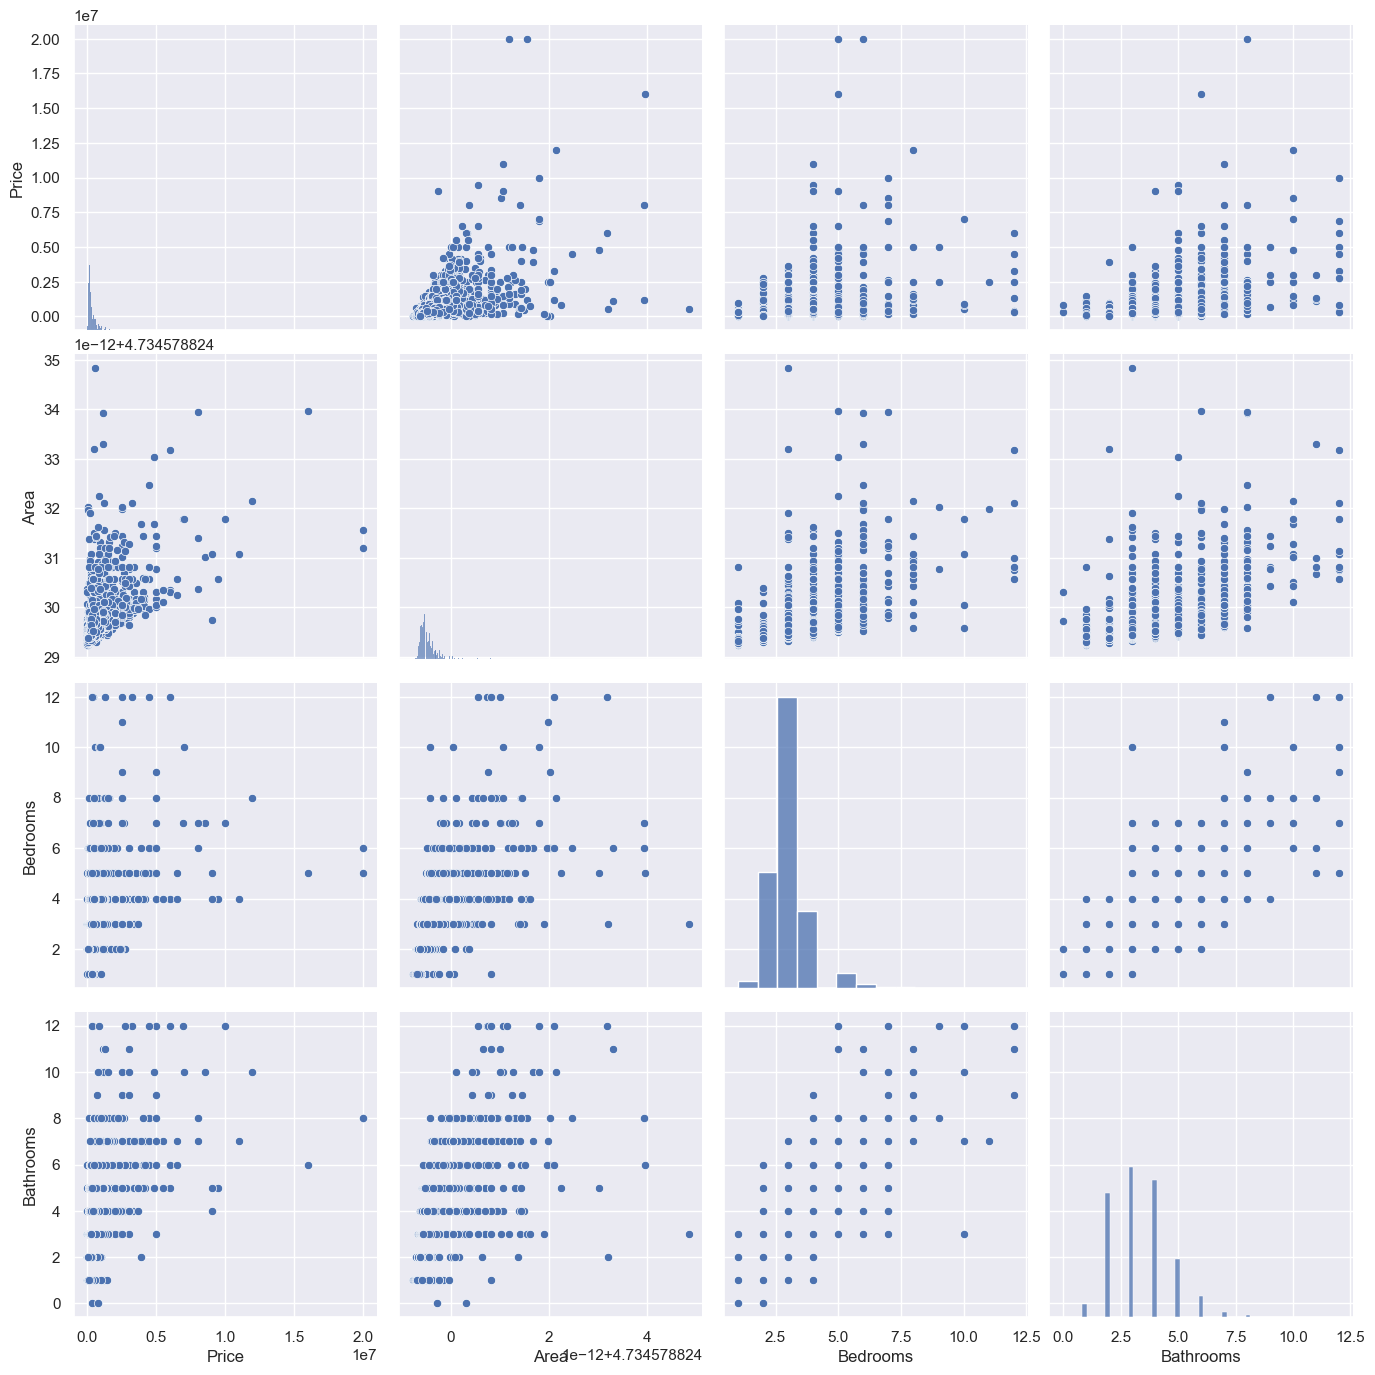

In [123]:
#scatterplot between 'SalePrice' and correlated variables
sns.set()
cols = ['Price', 'Area', 'Bedrooms', 'Bathrooms']
sns.pairplot(data[cols], height = 3.5)
plt.show();

C:\Users\Admin\AppData\Local\Temp\ipykernel_4500\1572045332.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


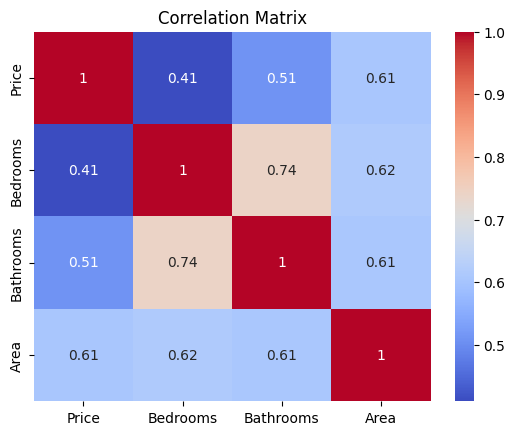

In [37]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

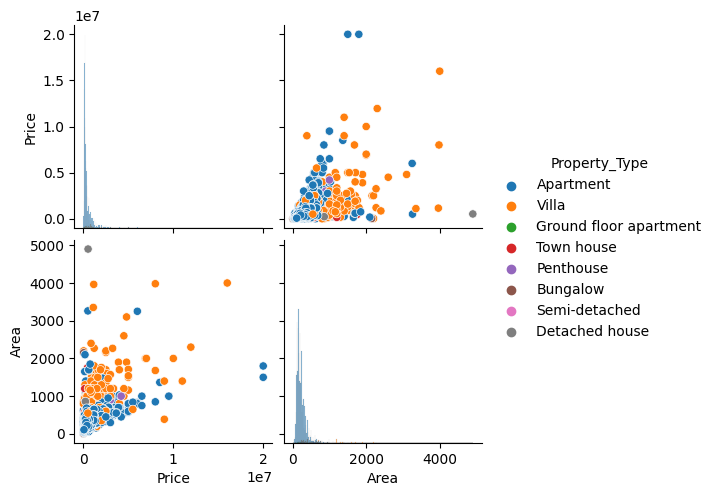

In [38]:
sns.pairplot(data, vars=['Price', 'Area'], hue='Property_Type', diag_kind='hist')

<Axes: xlabel='Area', ylabel='Price'>

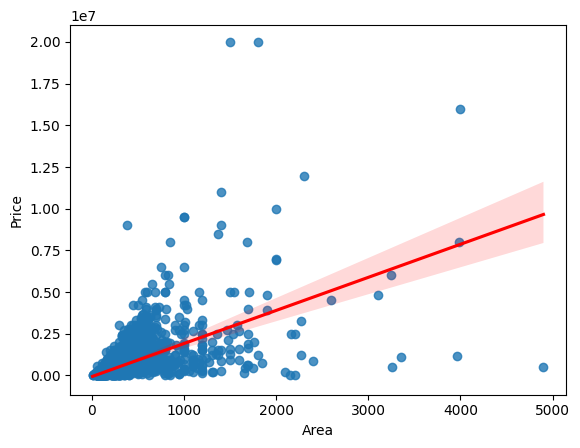

In [39]:
sns.regplot(x='Area',y='Price', data=data, line_kws= {'color':'red'})

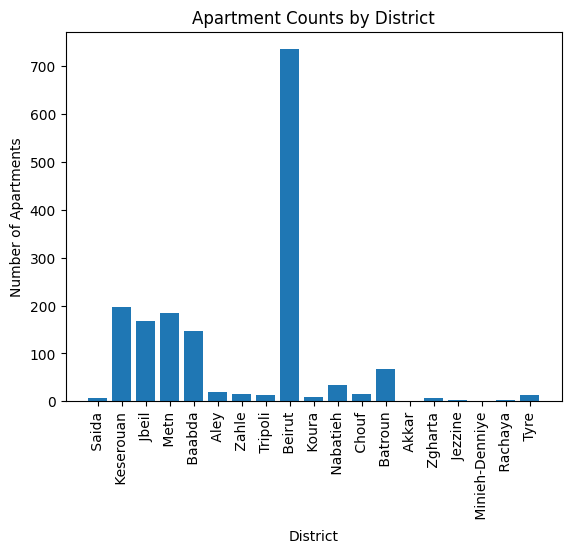

In [40]:
# Group the data by city and district and count the number of apartments in each group
counts = data.groupby(['City', 'District'])['Title'].count()

# Convert the counts to a pandas DataFrame for easier manipulation
counts_df = counts.reset_index(name='Count')

# Create the bar chart
plt.bar(x=counts_df['District'], height=counts_df['Count'])
plt.xticks(rotation=90)
plt.xlabel('District')
plt.ylabel('Number of Apartments')
plt.title('Apartment Counts by District')
plt.show()

In [50]:
prices_by_district=data.groupby('District').Price.mean()
prices_by_city=data.groupby('City').Price.mean()

<Axes: title={'center': 'Average Prices'}, ylabel='District'>

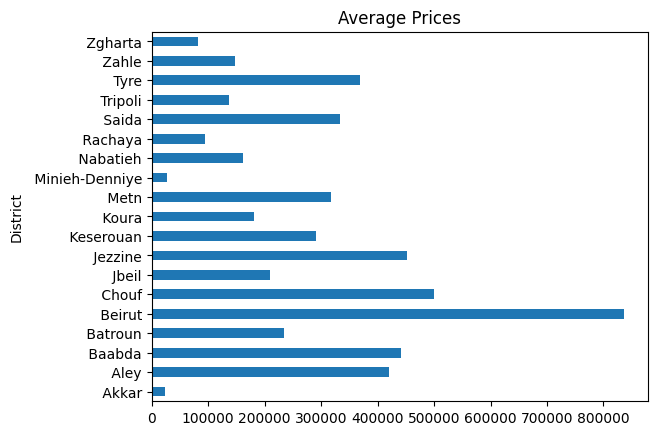

In [51]:
prices_by_district.plot(kind = "barh", y = "mean", legend = False,
            title = "Average Prices")

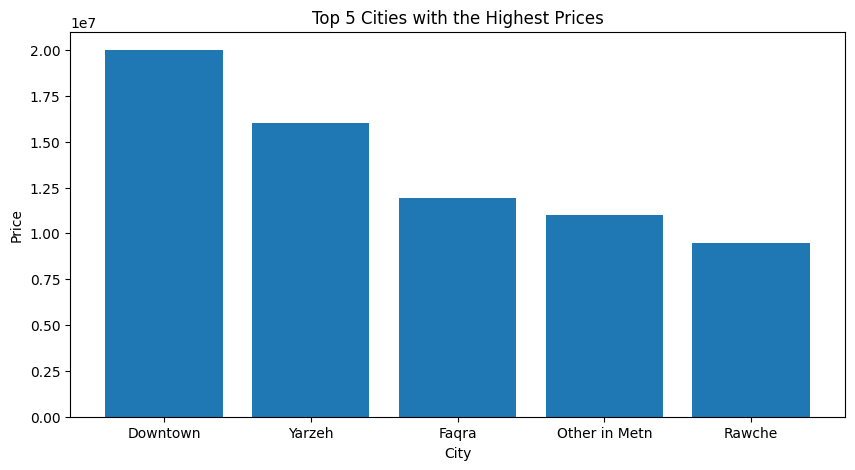

In [120]:
sorted_data = data.sort_values(by='Price', ascending=False)

# Select the top 10 cities with the highest prices
top_cities = sorted_data.head(8)
plt.figure(figsize=(10,5))
# Create a bar plot of the top 10 cities
plt.bar(top_cities['City'], top_cities['Price'])
plt.title('Top 5 Cities with the Highest Prices')
plt.xlabel('City')
plt.ylabel('Price')
plt.show()

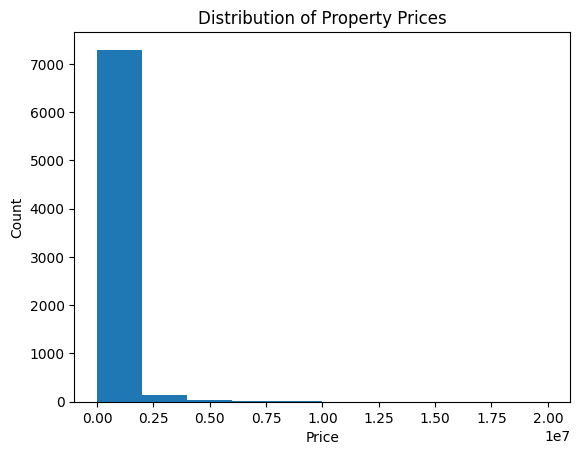

In [63]:
plt.hist(data['Price'])
plt.title('Distribution of Property Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

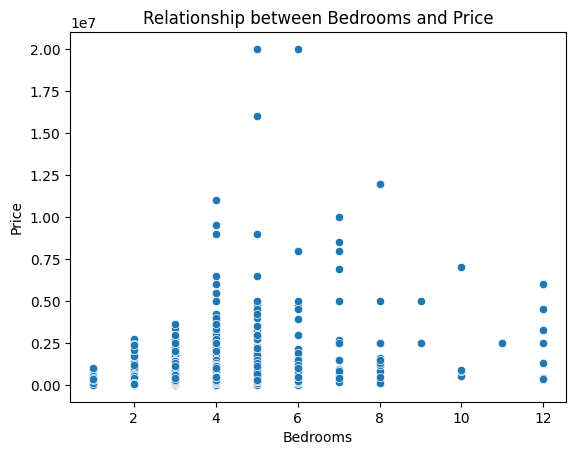

In [66]:

sns.scatterplot(x='Bedrooms', y='Price', data=data)
plt.title('Relationship between Bedrooms and Price')
plt.show()


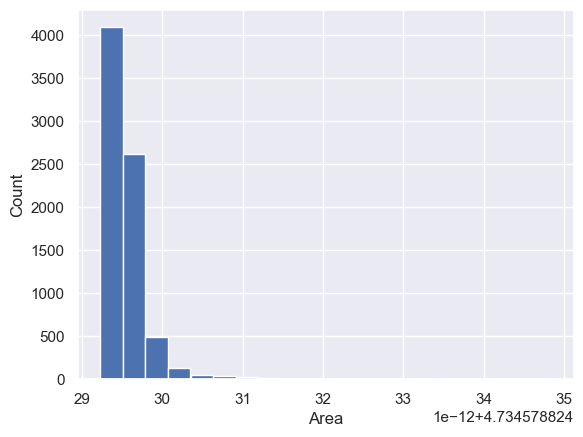

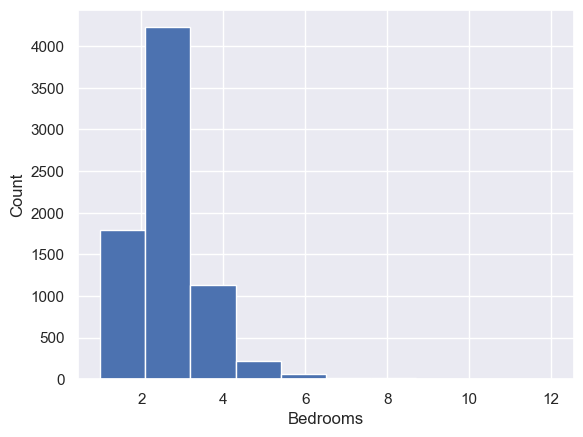

In [127]:
plt.hist(data['Area'], bins=20)
plt.xlabel('Area')
plt.ylabel('Count')
plt.show()

plt.hist(data['Bedrooms'], bins=10)
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.show()

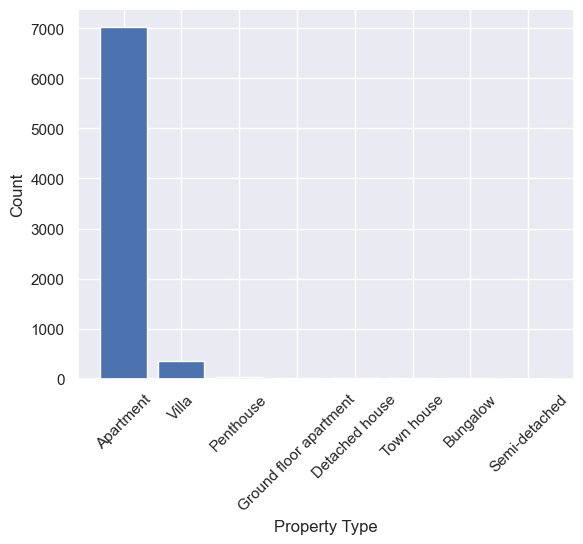

In [134]:
counts = data['Property_Type'].value_counts()
plt.bar(counts.index, counts.values)
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_4500\1566279500.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Area'], bins=50, color="g")


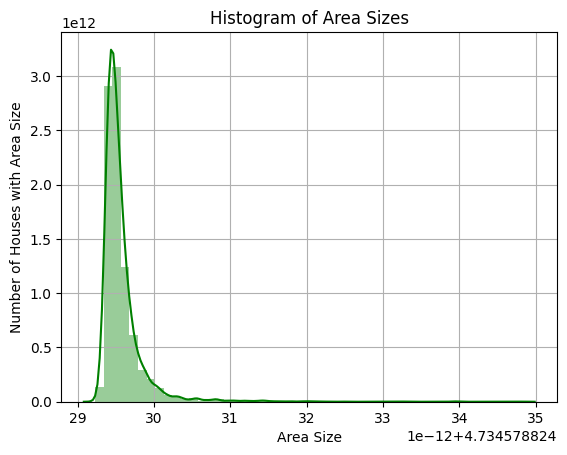

In [115]:
data['Area'] = np.log(data['Area'] + 100)

# Create the histogram with Seaborn
sns.distplot(data['Area'], bins=50, color="g")

# Set the x and y axis labels and the title
plt.xlabel("Area Size")
plt.ylabel("Number of Houses with Area Size") 
plt.title("Histogram of Area Sizes")

# Add grid lines
plt.grid(True) 

# Display the plot
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_4500\2074802662.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Price_log'], bins=50, color="g")


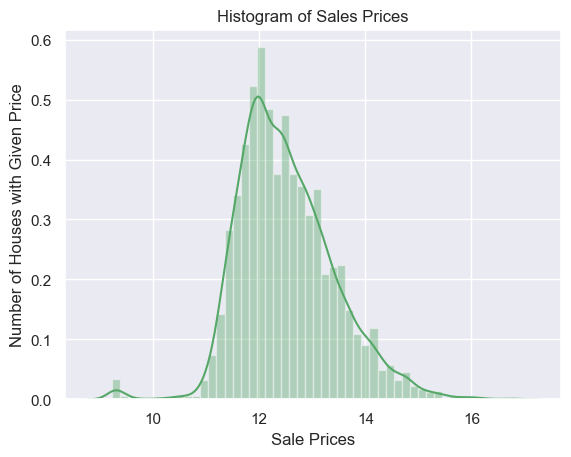

In [136]:
data['Price_log'] = np.log(data['Price'] + 10000)

# Create the histogram with Seaborn
sns.distplot(data['Price_log'], bins=50, color="g")

# Set the x and y axis labels and the title
plt.xlabel("Sale Prices")
plt.ylabel("Number of Houses with Given Price") 
plt.title("Histogram of Sales Prices")

# Add grid lines
plt.grid(True) 

# Display the plot
plt.show()